In [1573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Dataset is acquired from the following link:
https://archive.ics.uci.edu/ml/datasets/adult

### Import dataset

In [1574]:
train = pd.read_csv('G:/Adult_dataset/adult_data.csv',header = None)

### Data Exploration

In [1575]:
train.shape

(32561, 15)

In [1576]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Rename the columns based on the description in the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [1577]:
train.rename(index=str,columns={0:"age", 1:"work_class", 2:"fnlwgt", 3:"education",4:"education_num", 5:"marital_status", 6:"occupation", 7:"relationship", 8:"race", 9:"sex", 10:"captial_gain", 11:"capital_loss", 12:"hours_per_week", 13:"native_country", 14:"salary", },inplace=True)

In [1578]:
train.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1579]:
train.describe()

,age,fnlwgt,education_num,captial_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1580]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work_class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
captial_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### Quick pairplot to take a peek at the data at a high level

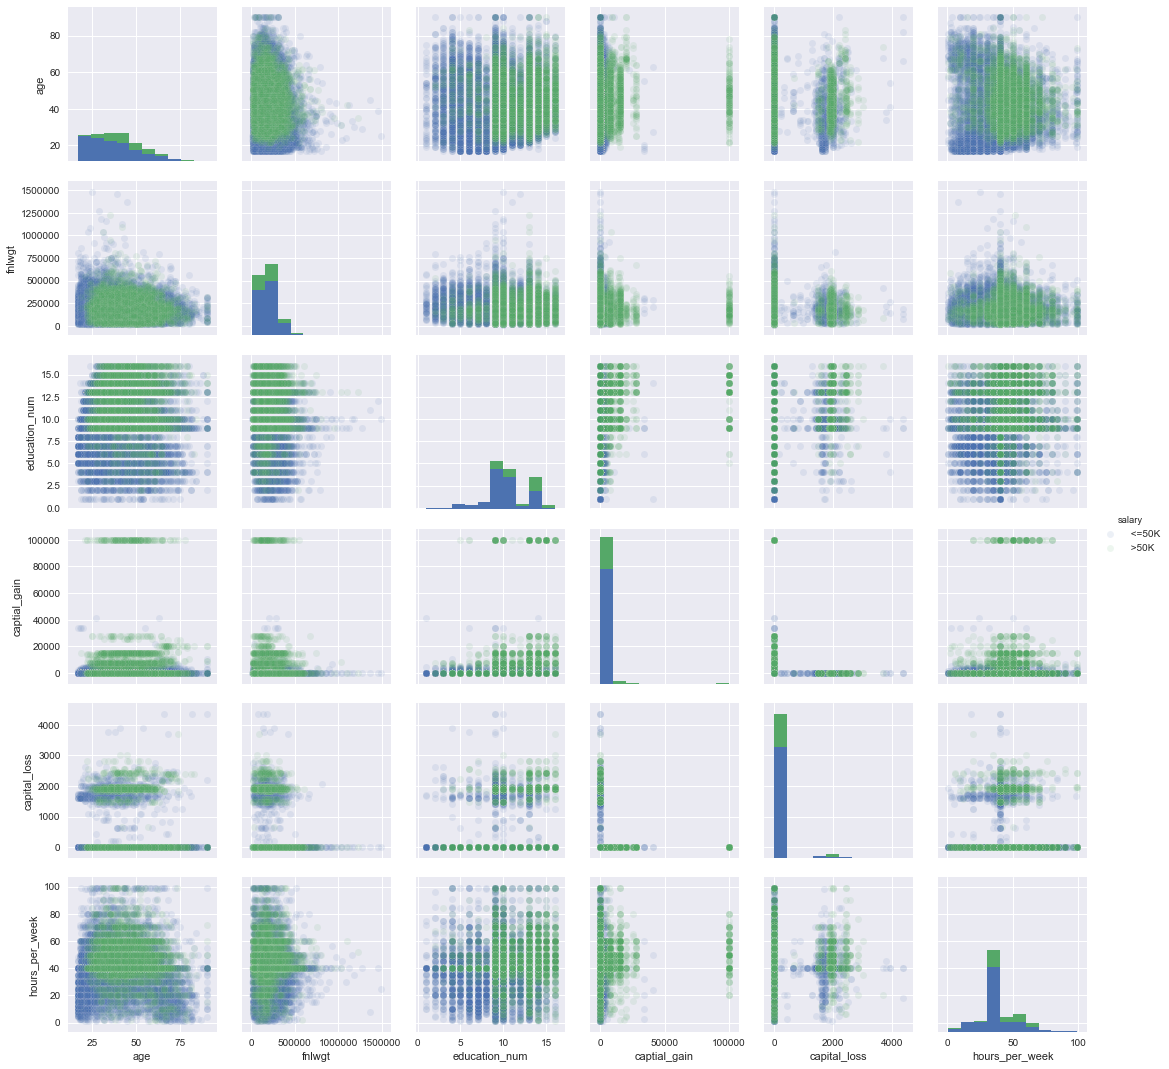

In [1581]:
sns.pairplot(train,hue ='salary',plot_kws={'alpha':0.1})

In [1582]:
salary10 = train.salary == ' >50K'
salary10 = salary10*1
train['salary10'] = salary10

In [1583]:
train.corr()

,age,fnlwgt,education_num,captial_gain,capital_loss,hours_per_week,salary10
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
captial_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
salary10,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


As expected Age, Education, Capital Gain and Hours worked per week has a correlation with earning >50k per year. Whats interesting here though is that Capital Loss is also correlated to making more than 50k a year. This is probably because you only invest your money if you make a decent amout.

### As we can see the dataset is unbalanced 3:1

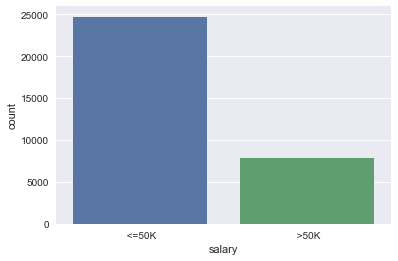

In [1590]:
sns.countplot(x="salary", data=train)
plt.savefig('unbalanced.png')

In [1591]:
train.salary.value_counts()/train.shape[0]

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

In [1592]:
train.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

### Going through each variable

#### Age

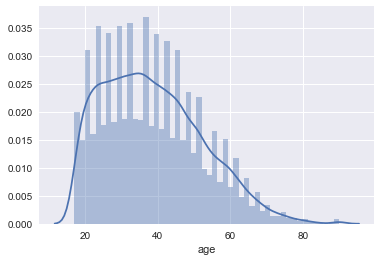

In [1593]:
sns.distplot(train['age'])

The age distribution of our dataset is skewed

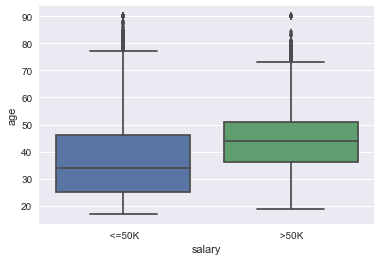

In [1595]:
sns.boxplot(train['salary'],train['age'])
plt.savefig('age.png')

As expected the older you are, the more likely you are to make more money

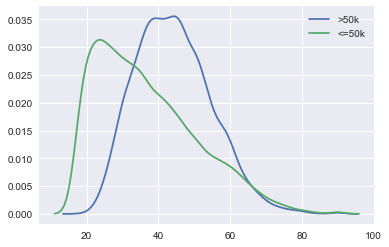

In [1596]:
sns.kdeplot(train.age[train['salary'] == ' >50K'],label = '>50k')
sns.kdeplot(train.age[train['salary'] == ' <=50K'],label = '<=50k')

As we look deeper we see that the age of people who makes >50k has a normal distribution while people who make <=50k has a skewed distribution.

#### Work-Class

In [1597]:
train.groupby(['work_class', 'salary'])['salary'].count()

work_class         salary
 ?                  <=50K     1645
                    >50K       191
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17733
                    >50K      4963
 Self-emp-inc       <=50K      494
                    >50K       622
 Self-emp-not-inc   <=50K     1817
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
Name: salary, dtype: int64

There are missing values in this column. The key with dealing with missing values is to know why they are missing. Once we find out the reason we can properly replace its value

In [1598]:
print('Total missing values for work_class: ' +str(train.salary[train['work_class'] == ' ?'].count()))

Total missing values for work_class: 1836


In [1599]:
print('>50K: '+str(train.salary[(train['work_class'] == ' ?') & (train['salary'] == ' >50K')].count()/train.salary[train['work_class'] == ' ?'].count()))
print('<=50K: '+str(train.salary[(train['work_class'] == ' ?') & (train['salary'] == ' <=50K')].count()/train.salary[train['work_class'] == ' ?'].count()))
print('The ratio between >50k and <=50k is far from the whole population. We can assume that this is systematic and not random so, we have to use a more complex method of predicting the missing values. We will address this problem later after we go though all of the variables')

>50K: 0.104030501089
<=50K: 0.895969498911
The ratio between >50k and <=50k is far from the whole population. We can assume that this is systematic and not random so, we have to use a more complex method of predicting the missing values. We will address this problem later after we go though all of the variables


We also notice that 'without-pay' and 'never worked' have similar stats (<=50k). We will combine them together

In [1600]:
train.loc[(train['work_class'] == ' Never-worked') | (train['work_class'] == ' Without-pay'),'work_class'] = 'No_Salary'

In [1601]:
train['work_class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', 'No_Salary'], dtype=object)

In [1602]:
train['work_class'] = train['work_class'].str.strip()

In [1603]:
train.loc[(train['work_class'] == 'Self-emp-not-inc'),'work_class'] = 'Self_emp_not_inc'

In [1604]:
train.loc[(train['work_class'] == 'State-gov'),'work_class'] = 'State_gov'

In [1605]:
train.loc[(train['work_class'] == 'Local-gov'),'work_class'] = 'Local_gov'

In [1606]:
train.loc[(train['work_class'] == 'Self-emp-inc'),'work_class'] = 'Self_emp_inc'

In [1607]:
train.loc[(train['work_class'] == 'Federal-gov'),'work_class'] = 'Federal_gov'

In [1608]:
train['work_class'].value_counts()

Private             22696
Self_emp_not_inc     2541
Local_gov            2093
?                    1836
State_gov            1298
Self_emp_inc         1116
Federal_gov           960
No_Salary              21
Name: work_class, dtype: int64

#### fnlwgt

This stands for the 'final weight'. This was used for sampling. People who have similar demographics should have similar weights. However, the similarities does not cover the columns that have missing values. We will drop this columns

In [1609]:
train.fnlwgt[train['work_class']==' ?'].value_counts()

Series([], Name: fnlwgt, dtype: int64)

In [1610]:
train.loc[train['fnlwgt'] == 174995]

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,salary,salary10
17549,46,Private,174995,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,<=50K,0
18839,66,Self_emp_not_inc,174995,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,2290,0,30,Hungary,<=50K,0
20953,80,?,174995,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,8,Canada,<=50K,0
26549,67,?,174995,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,2457,40,United-States,<=50K,0


In [1611]:
train.drop('fnlwgt',axis = 1,inplace = True)

#### Education

In [1612]:
train['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [1613]:
train.groupby(['education', 'salary'])['salary'].count()

education      salary
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3134
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
Name: salary, dtype: int64

#### Education num

Education and education_num is basically the same 

In [1614]:
train[['education','education_num']].drop_duplicates().sort_values('education_num',ascending = False)

,education,education_num
20,Doctorate,16
52,Prof-school,15
5,Masters,14
0,Bachelors,13
13,Assoc-acdm,12
14,Assoc-voc,11
10,Some-college,10
2,HS-grad,9
415,12th,8
3,11th,7


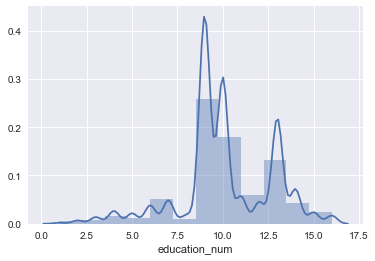

In [1615]:
sns.distplot(train['education_num'],bins=12)

As we can see there are spikes in the same places in the graph such as finishing high school, associates etc. 

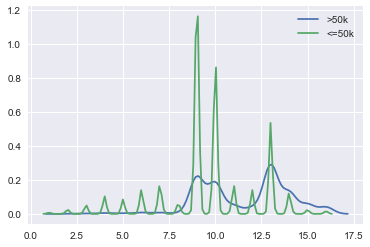

In [1616]:
sns.kdeplot(train.education_num[train['salary'] == ' >50K'],label = '>50k')
sns.kdeplot(train.education_num[train['salary'] == ' <=50K'],label = '<=50k')

Based on this plot we can assume that you have to have atleast High School education to make atleast 50k a year. Conversely, if you have less than High School education your salary will be less than 50k.

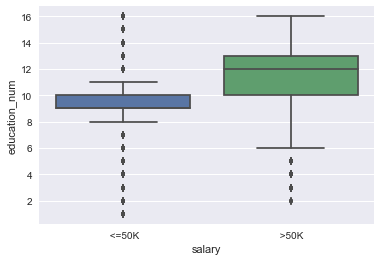

In [1618]:
sns.boxplot(train['salary'],train['education_num'])
plt.savefig('education.png')

In this plot we can see that people who make over 50k are usually more educated. Interestingly they also have a higher standard deviation. 

We can drop the education column since its basically the same as education_num

In [1619]:
train.drop('education',axis = 1,inplace = True)

#### Marital Status

In [1620]:
train['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

Based on my research: <br /> 
AF: Armed Forces<br /> 
civ: Civilian

In [1621]:
print('Ratio of >50k to <=50k:')
(train.marital_status[train['salary'] == ' >50K'].value_counts()/train['marital_status'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


 Married-civ-spouse       0.446848
 Married-AF-spouse        0.434783
 Divorced                 0.104209
 Widowed                  0.085599
 Married-spouse-absent    0.081340
 Separated                0.064390
 Never-married            0.045961
Name: marital_status, dtype: float64

We will divide this into 2 classes. Married and Not Married for simplicity based on similarity

In [1622]:
train['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [1623]:
train.loc[(train['marital_status'] == ' Married-civ-spouse'),'marital_status'] = 'Married'
train.loc[(train['marital_status'] == ' Married-AF-spouse'),'marital_status'] = 'Married'
train.loc[(train['marital_status'] == ' Never-married'),'marital_status'] = 'Never_Married'#'Not_Married'
#train.loc[(train['marital_status'] == ' Divorced'),'marital_status'] = 'Not_Married'
train.loc[(train['marital_status'] == ' Married-spouse-absent'),'marital_status'] = 'Married_spouse_absent'#'Not_Married'
train.loc[(train['marital_status'] == ' Separated'),'marital_status'] = 'Not_Married'
train.loc[(train['marital_status'] == ' Widowed'),'marital_status'] = 'Not_Married'

In [1624]:
train['marital_status'].unique()

array(['Never_Married', 'Married', ' Divorced', 'Married_spouse_absent',
       'Not_Married'], dtype=object)

In [1625]:
train['marital_status'] = train['marital_status'].str.strip()

In [1626]:
print('Ratio of >50k to <=50k:')
(train.marital_status[train['salary'] == ' >50K'].value_counts()/train['marital_status'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


Married                  0.446830
Divorced                 0.104209
Married_spouse_absent    0.081340
Not_Married              0.074827
Never_Married            0.045961
Name: marital_status, dtype: float64

In [1627]:
train['marital_status'].value_counts()

Married                  14999
Never_Married            10683
Divorced                  4443
Not_Married               2018
Married_spouse_absent      418
Name: marital_status, dtype: int64

It is now much clearer that married couples are more likely to earn more than 50k

####  Occupation

In [1628]:
train['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [1629]:
print('Ratio of >50k to <=50k:')
(train.occupation[train['salary'] == ' >50K'].value_counts()/train['occupation'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


 Exec-managerial      0.484014
 Prof-specialty       0.449034
 Protective-serv      0.325116
 Tech-support         0.304957
 Sales                0.269315
 Craft-repair         0.226641
 Transport-moving     0.200376
 Adm-clerical         0.134483
 Machine-op-inspct    0.124875
 Farming-fishing      0.115694
 Armed-Forces         0.111111
 ?                    0.103635
 Handlers-cleaners    0.062774
 Other-service        0.041578
 Priv-house-serv      0.006711
Name: occupation, dtype: float64

We are going to group together similarly paid occupations namely: High, Medium, Low

In [1630]:
train.loc[(train['occupation'] == ' Exec-managerial'),'occupation'] = 'High'
train.loc[(train['occupation'] == ' Prof-specialty'),'occupation'] = 'High'
train.loc[(train['occupation'] == ' Protective-serv'),'occupation'] = 'Medium'
train.loc[(train['occupation'] == ' Tech-support'),'occupation'] = 'Medium'
train.loc[(train['occupation'] == ' Sales'),'occupation'] = 'Medium'
train.loc[(train['occupation'] == ' Craft-repair'),'occupation'] = 'Medium'
train.loc[(train['occupation'] == ' Transport-moving'),'occupation'] = 'Medium'
train.loc[(train['occupation'] == ' Adm-clerical'),'occupation'] = 'Low'
train.loc[(train['occupation'] == ' Machine-op-inspct'),'occupation'] = 'Low'
train.loc[(train['occupation'] == ' Farming-fishing'),'occupation'] = 'Low'
train.loc[(train['occupation'] == ' Armed-Forces'),'occupation'] = 'Low'
#train.loc[(train['occupation'] == ' ?'),'occupation'] = '?'
train.loc[(train['occupation'] == ' Handlers-cleaners'),'occupation'] = 'Low'
train.loc[(train['occupation'] == ' Other-service'),'occupation'] = 'Low'
train.loc[(train['occupation'] == ' Priv-house-serv'),'occupation'] = 'Low'

In [1631]:
train['occupation'].unique()

array(['Low', 'High', 'Medium', ' ?'], dtype=object)

In [1632]:
print('Ratio of >50k to <=50k:')
(train.occupation[train['salary'] == ' >50K'].value_counts()/train['occupation'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


High      0.466366
Medium    0.249565
 ?        0.103635
Low       0.094659
Name: occupation, dtype: float64

#### Relationship

In [1633]:
train['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [1634]:
print('Ratio of >50k to <=50k:')
(train.relationship[train['salary'] == ' >50K'].value_counts()/train['relationship'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


 Wife              0.475128
 Husband           0.448571
 Not-in-family     0.103070
 Unmarried         0.063262
 Other-relative    0.037717
 Own-child         0.013220
Name: relationship, dtype: float64

For this column we will also group similar categories.

In [1635]:
train.loc[(train['relationship'] == ' Not-in-family'),'relationship'] = 'Not_in_family'#'Other'
train.loc[(train['relationship'] == ' Husband'),'relationship'] = 'Parent'
train.loc[(train['relationship'] == ' Wife'),'relationship'] = 'Parent'
train.loc[(train['relationship'] == ' Own-child'),'relationship'] = 'own_child'#'Other'
#train.loc[(train['relationship'] == ' Unmarried'),'relationship'] = 'Other'
train.loc[(train['relationship'] == ' Other-relative'),'relationship'] = 'other_relative'#'Other'

In [1636]:
train['relationship'].unique()

array(['Not_in_family', 'Parent', 'own_child', ' Unmarried',
       'other_relative'], dtype=object)

In [1637]:
print('Ratio of >50k to <=50k:')
(train.relationship[train['salary'] == ' >50K'].value_counts()/train['relationship'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


Parent            0.451392
Not_in_family     0.103070
 Unmarried        0.063262
other_relative    0.037717
own_child         0.013220
Name: relationship, dtype: float64

In [1638]:
train['relationship'] = train['relationship'].str.strip()

#### Race

In [1639]:
train['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [1640]:
print('Ratio of >50k to <=50k:')
(train.race[train['salary'] == ' >50K'].value_counts()/train['race'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


 Asian-Pac-Islander    0.265640
 White                 0.255860
 Black                 0.123880
 Amer-Indian-Eskimo    0.115756
 Other                 0.092251
Name: race, dtype: float64

Again we will group similar categories

In [1641]:
train.loc[(train['race'] == ' White'),'race'] = 'AW'
train.loc[(train['race'] == ' Black'),'race'] = 'Other'
train.loc[(train['race'] == ' Asian-Pac-Islander'),'race'] = 'AW'
train.loc[(train['race'] == ' Amer-Indian-Eskimo'),'race'] = 'Other'
train.loc[(train['race'] == ' Other'),'race'] = 'Other'

In [1642]:
train.race.unique()

array(['AW', 'Other'], dtype=object)

In [1643]:
print('Ratio of >50k to <=50k:')
(train.race[train['salary'] == ' >50K'].value_counts()/train['race'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


AW       0.256212
Other    0.120885
Name: race, dtype: float64

#### Sex

In [1644]:
train['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [1645]:
print('Ratio of >50k to <=50k:')
(train.sex[train['salary'] == ' >50K'].value_counts()/train['sex'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


 Male      0.305737
 Female    0.109461
Name: sex, dtype: float64

In [1646]:
train['sex'] = train['sex'].str.strip()

#### Capital Gains

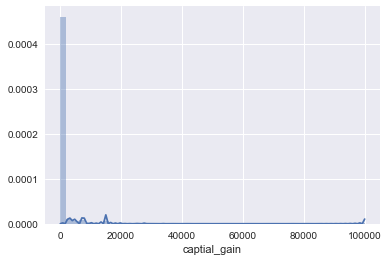

In [1647]:
sns.distplot((train['captial_gain']))

As we can see here is that a lot of people dont gain anything from investing or doent invest at all. So, we will analyze the data without the people who didnt make anything external income.

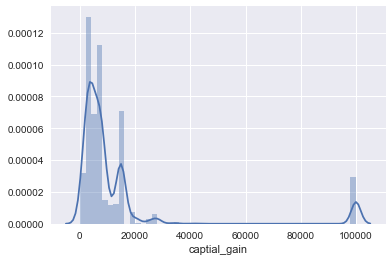

In [1648]:
sns.distplot(train.captial_gain[train['captial_gain']>0])

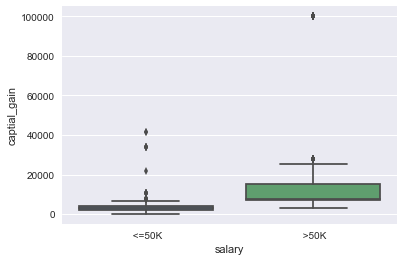

In [1650]:
sns.boxplot(train['salary'],train.captial_gain[train['captial_gain']>0])
plt.savefig('capitalgains.png')

As we can see people who make more than 50k a year make more capital gains. This is probably because they have more money to invest therefore returns are also bigger.

In [1651]:
train.salary[train['captial_gain']>0].value_counts()/np.sum((train['captial_gain']>0)*1)

 >50K     0.618363
 <=50K    0.381637
Name: salary, dtype: float64

#### Capital Loss

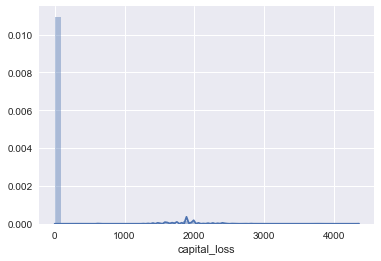

In [1652]:
sns.distplot((train['capital_loss']))

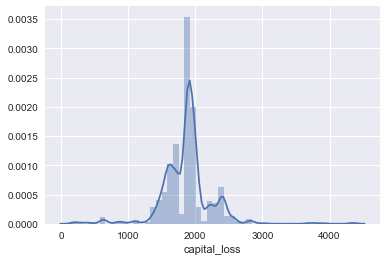

In [1653]:
sns.distplot(train.capital_loss[train['capital_loss']>0])

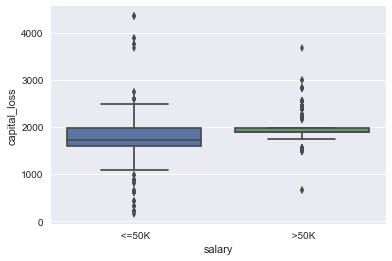

In [1654]:
sns.boxplot(train['salary'],train.capital_loss[train['capital_loss']>0])
plt.savefig('capitalgains2.png')

Interestingly, both >50k and <=50k income losses about the same about. Its just that <=50k income has a higher standard deviation

In [1655]:
print('Ratio of >50k to <=50k:')
train.salary[train['capital_loss']>0].value_counts()/np.sum((train['capital_loss']>0)*1)

Ratio of >50k to <=50k:


 >50K     0.508887
 <=50K    0.491113
Name: salary, dtype: float64

People who lose money through external sources are split in the middle

I will create a variable called 'investor'. Wherein a person who has gained or lost something will be marked.

In [1656]:
train['investor'] = 0

In [1657]:
train.loc[(train['capital_loss']>0) | (train['captial_gain']>0),'investor'] = 1

In [1658]:
print('Ratio of >50k to <=50k:')
(train.investor[train['salary'] == ' >50K'].value_counts()/train['investor'].value_counts()).sort_values(ascending = False)

Ratio of >50k to <=50k:


1    0.579059
0    0.190293
Name: investor, dtype: float64

As we can see here, people who invest generally make more than 50k a year.

#### Hours per Week

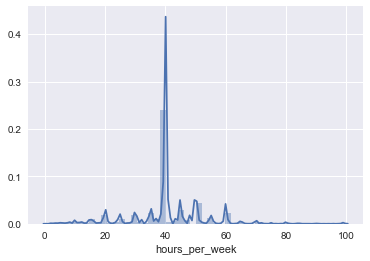

In [1659]:
sns.distplot((train['hours_per_week']))

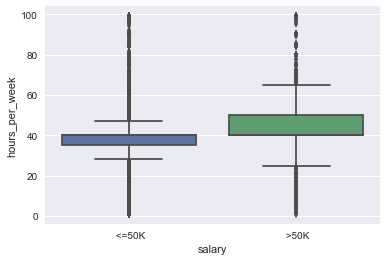

In [1660]:
sns.boxplot(train['salary'],train['hours_per_week'])

As we can see, people who make more than 50k a year usually work more than who make less than 50k

#### Native Country

In [1661]:
train['native_country'] = train['native_country'].str.strip()

In [1662]:
train['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

I will be adding new variables based on the different countries

#### Continent: Countries may be different but usually being in the same continent makes you somewhat similar culturally

In [1663]:
d = {'Native-country': ['United-States', 'Mexico', '?', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru', 'Greece', 'France', 'Ecuador', 'Ireland', 'Hong', 'Trinadad&Tobago', 'Cambodia', 'Thailand', 'Laos', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands'], 
     'native_continent': ['North_America', 'North_America', 'Unknown', 'Asia', 'Europe', 'North_America', 'South_America', 'South_America', 'Asia', 'South_America', 'Europe', 'South_America', 'Africa', 'Asia', 'Europe', 'South_America', 'Asia', 'South_America', 'Asia', 'Europe', 'South_America', 'Asia', 'South_America', 'Asia', 'Europe', 'South_America', 'South_America', 'Europe', 'Europe', 'South_America', 'Europe', 'Asia', 'South_America', 'Asia', 'Asia', 'Asia', 'Europe', 'Asia', 'South_America', 'Europe', 'Europe', 'Europe']}
Continent_Country = pd.DataFrame(data=d)
Continent_Country

,Native-country,native_continent
0,United-States,North_America
1,Mexico,North_America
2,?,Unknown
3,Philippines,Asia
4,Germany,Europe
5,Canada,North_America
6,Puerto-Rico,South_America
7,El-Salvador,South_America
8,India,Asia
9,Cuba,South_America


In [1664]:
train = train.join(Continent_Country.set_index('Native-country'), on='native_country')

#### GDP per capita source: World Bank and some extrapolation by me

For the unknown we will be using the mean GDP

In [1665]:
d = {'Native-country': ['United-States', 'Mexico', '?', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru', 'Greece', 'France', 'Ecuador', 'Ireland', 'Hong', 'Trinadad&Tobago', 'Cambodia', 'Thailand', 'Laos', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands'], 
    'gdp_per_capita':[27776,5710,8858,929,27086,19859,10876,1458,342,2621,19709,1953,3445,473,19273,1871,230,1276,39268,2874,2218,13000,282,1202,9978,854,1900,11091,23625,2028,15922,22502,3956,270,2490,325,1700,14000,618,4172,19709,24331]}
GDP_Country = pd.DataFrame(data=d)
GDP_Country

,Native-country,gdp_per_capita
0,United-States,27776
1,Mexico,5710
2,?,8858
3,Philippines,929
4,Germany,27086
5,Canada,19859
6,Puerto-Rico,10876
7,El-Salvador,1458
8,India,342
9,Cuba,2621


In [1666]:
train = train.join(GDP_Country.set_index('Native-country'), on='native_country')

In [1667]:
train.head()

,age,work_class,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,salary,salary10,investor,native_continent,gdp_per_capita
0,39,State_gov,13,Never_Married,Low,Not_in_family,AW,Male,2174,0,40,United-States,<=50K,0,1,North_America,27776
1,50,Self_emp_not_inc,13,Married,High,Parent,AW,Male,0,0,13,United-States,<=50K,0,0,North_America,27776
2,38,Private,9,Divorced,Low,Not_in_family,AW,Male,0,0,40,United-States,<=50K,0,0,North_America,27776
3,53,Private,7,Married,Low,Parent,Other,Male,0,0,40,United-States,<=50K,0,0,North_America,27776
4,28,Private,13,Married,High,Parent,Other,Female,0,0,40,Cuba,<=50K,0,0,South_America,2621


In [1668]:
train['native_continent'].value_counts()

North_America    29934
South_America      758
Asia               685
Unknown            583
Europe             521
Africa              80
Name: native_continent, dtype: int64

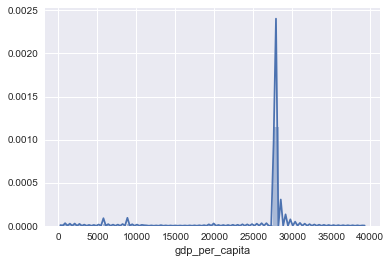

In [1669]:
sns.distplot(train['gdp_per_capita'])

We can now remove the native countries continent

In [1670]:
train.drop('native_country',axis = 1,inplace = True)

### Check for NA

In [1671]:
def count_qm(column):
    return list(column).count(' ?')
    

In [1672]:
train.apply(count_qm) 

age                    0
work_class             0
education_num          0
marital_status         0
occupation          1843
relationship           0
race                   0
sex                    0
captial_gain           0
capital_loss           0
hours_per_week         0
salary                 0
salary10               0
investor               0
native_continent       0
gdp_per_capita         0
dtype: int64

In [1673]:
train.work_class[train['occupation'] == ' ?'].unique()

array(['?', 'No_Salary'], dtype=object)

Some people with unknown values for occupation has either an unknown value for work_class or No Salary. Let us take a deeper look at these people.

In [1674]:
train[train['work_class'] == 'No Salary']

,age,work_class,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,salary,salary10,investor,native_continent,gdp_per_capita


As we can see most of them are in the low category for occupation. We will assign all of the missing values with Low.

In [1675]:
train.loc[(train['work_class'] == 'No Salary') & (train['occupation'] == ' ?'),'occupation'] = 'Low'

In [1676]:
train.apply(count_qm) 

age                    0
work_class             0
education_num          0
marital_status         0
occupation          1843
relationship           0
race                   0
sex                    0
captial_gain           0
capital_loss           0
hours_per_week         0
salary                 0
salary10               0
investor               0
native_continent       0
gdp_per_capita         0
dtype: int64

In [1677]:
train[(train['work_class']==' ?')&(train['occupation']==' ?')].shape

(0, 16)

As we can see all everyone with a missing occupation also has a missing work class. Lets take a look at them and compare them to the whole dataset.

In [1678]:
train[(train['work_class']==' ?')&(train['occupation']==' ?')].head()

,age,work_class,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,salary,salary10,investor,native_continent,gdp_per_capita


In [1682]:
1836/32561

0.05638647461687295

As we can see there are a low percentage of people who has salary >50k  who has missing data. Furthermore, they are only 5% of the dataset. This small portion of the dataset is not very valuable so we will just throw them out becuase 'guessing' their real value might lead to a greater error.

In [1683]:
train = train[(train['work_class'] != ' ?')&(train['occupation'] != ' ?')]

In [1684]:
train.head()

,age,work_class,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,salary,salary10,investor,native_continent,gdp_per_capita
0,39,State_gov,13,Never_Married,Low,Not_in_family,AW,Male,2174,0,40,<=50K,0,1,North_America,27776
1,50,Self_emp_not_inc,13,Married,High,Parent,AW,Male,0,0,13,<=50K,0,0,North_America,27776
2,38,Private,9,Divorced,Low,Not_in_family,AW,Male,0,0,40,<=50K,0,0,North_America,27776
3,53,Private,7,Married,Low,Parent,Other,Male,0,0,40,<=50K,0,0,North_America,27776
4,28,Private,13,Married,High,Parent,Other,Female,0,0,40,<=50K,0,0,South_America,2621


In [1685]:
train.drop('salary',axis = 1,inplace = True)

### Converting categorical columns into numerical

In [1686]:
train = pd.get_dummies(train)

In [1687]:
train.head()

,age,education_num,captial_gain,capital_loss,hours_per_week,salary10,investor,gdp_per_capita,work_class_Federal_gov,work_class_Local_gov,...,race_AW,race_Other,sex_Female,sex_Male,native_continent_Africa,native_continent_Asia,native_continent_Europe,native_continent_North_America,native_continent_South_America,native_continent_Unknown
0,39,13,2174,0,40,0,1,27776,0,0,...,1,0,0,1,0,0,0,1,0,0
1,50,13,0,0,13,0,0,27776,0,0,...,1,0,0,1,0,0,0,1,0,0
2,38,9,0,0,40,0,0,27776,0,0,...,1,0,0,1,0,0,0,1,0,0
3,53,7,0,0,40,0,0,27776,0,0,...,0,1,0,1,0,0,0,1,0,0
4,28,13,0,0,40,0,0,2621,0,0,...,0,1,1,0,0,0,0,0,1,0


### Normalize Data

In [106]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer

In [107]:
norm = Normalizer()
norm.fit(train.drop('salary10',axis = 1))
train_normalized = norm.transform(train.drop('salary10',axis = 1))

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [108]:
train_normalized

array([[  1.39980579e-03,   4.66601931e-04,   7.80301999e-02, ...,
          3.58924563e-05,   0.00000000e+00,   0.00000000e+00],
       [  1.80011189e-03,   4.68029091e-04,   0.00000000e+00, ...,
          3.60022378e-05,   0.00000000e+00,   0.00000000e+00],
       [  1.36808478e-03,   3.24020080e-04,   0.00000000e+00, ...,
          3.60022311e-05,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.08812680e-03,   3.24019676e-04,   0.00000000e+00, ...,
          3.60021863e-05,   0.00000000e+00,   0.00000000e+00],
       [  7.92050192e-04,   3.24020533e-04,   0.00000000e+00, ...,
          3.60022815e-05,   0.00000000e+00,   0.00000000e+00],
       [  1.64666565e-03,   2.84999825e-04,   4.75759707e-01, ...,
          3.16666472e-05,   0.00000000e+00,   0.00000000e+00]])

In [109]:
train_names = train.drop('salary10',axis = 1).columns

In [110]:
train_normalized.shape

(30718, 37)

In [111]:
train_normalized1 = train_normalized 

In [112]:
train_normalized = train_normalized1

In [113]:
train_normalized = np.insert(train_normalized, train_normalized.shape[1], np.array(train['salary10']), axis=1)

In [114]:
train_names = list(train_names)

In [115]:
train_names.append('salary')

In [116]:
print(train_names)

['age', 'education_num', 'captial_gain', 'capital_loss', 'hours_per_week', 'investor', 'gdp_per_capita', 'work_class_Federal_gov', 'work_class_Local_gov', 'work_class_No_Salary', 'work_class_Private', 'work_class_Self_emp_inc', 'work_class_Self_emp_not_inc', 'work_class_State_gov', 'marital_status_Divorced', 'marital_status_Married', 'marital_status_Married_spouse_absent', 'marital_status_Never_Married', 'marital_status_Not_Married', 'occupation_High', 'occupation_Low', 'occupation_Medium', 'relationship_Not_in_family', 'relationship_Parent', 'relationship_Unmarried', 'relationship_other_relative', 'relationship_own_child', 'race_AW', 'race_Other', 'sex_Female', 'sex_Male', 'native_continent_Africa', 'native_continent_Asia', 'native_continent_Europe', 'native_continent_North_America', 'native_continent_South_America', 'native_continent_Unknown', 'salary']


In [117]:
train_normalized = pd.DataFrame(train_normalized,columns=train_names)

### Correlation

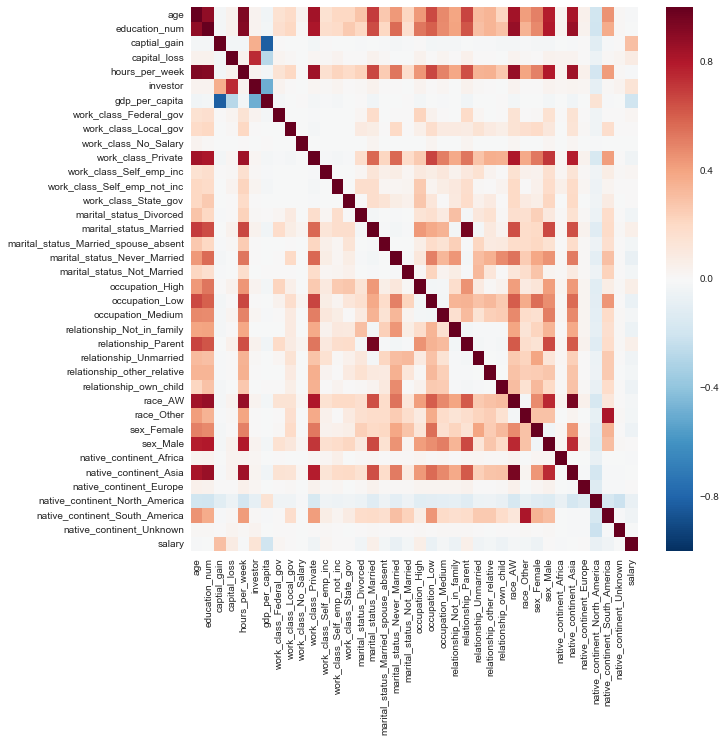

In [118]:
import seaborn as sns
corr = train_normalized.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)

Remove correlated variables

In [119]:
train_normalized.columns

Index(['age', 'education_num', 'captial_gain', 'capital_loss',
       'hours_per_week', 'investor', 'gdp_per_capita',
       'work_class_Federal_gov', 'work_class_Local_gov',
       'work_class_No_Salary', 'work_class_Private', 'work_class_Self_emp_inc',
       'work_class_Self_emp_not_inc', 'work_class_State_gov',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Married_spouse_absent', 'marital_status_Never_Married',
       'marital_status_Not_Married', 'occupation_High', 'occupation_Low',
       'occupation_Medium', 'relationship_Not_in_family',
       'relationship_Parent', 'relationship_Unmarried',
       'relationship_other_relative', 'relationship_own_child', 'race_AW',
       'race_Other', 'sex_Female', 'sex_Male', 'native_continent_Africa',
       'native_continent_Asia', 'native_continent_Europe',
       'native_continent_North_America', 'native_continent_South_America',
       'native_continent_Unknown', 'salary'],
      dtype='object')

In [120]:
train_normalized.drop('native_continent_North_America',axis = 1,inplace = True)

In [121]:
train_normalized.drop('marital_status_Married',axis = 1,inplace = True)

In [122]:
train_normalized.drop('relationship_Parent',axis = 1,inplace = True)

In [123]:
train_normalized.drop('race_AW',axis = 1,inplace = True)

In [124]:
train_normalized.drop('sex_Male',axis = 1,inplace = True)

In [125]:
train_normalized.drop('work_class_Private',axis = 1,inplace = True)

In [126]:
train_normalized.drop('occupation_Low',axis = 1,inplace = True)

### VIF

In [127]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
def get_vif(data):
    features = "+".join(set(data.columns) - set(["salary"]))
    y, X = dmatrices('salary~' + features, data, return_type='dataframe')
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif.round(1)

In [129]:
get_vif(train_normalized)

,VIF Factor,features
0,797.8,Intercept
1,2.0,sex_Female
2,2.4,marital_status_Not_Married
3,15.0,age
4,5.1,relationship_own_child
5,15.3,hours_per_week
6,1.1,native_continent_Europe
7,1.1,work_class_Self_emp_inc
8,1.2,work_class_State_gov
9,3.6,investor


In [130]:
train_normalized.drop('native_continent_Asia',axis = 1,inplace = True)

In [131]:
train_normalized.drop('marital_status_Never_Married',axis = 1,inplace = True)

In [132]:
get_vif(train_normalized)

,VIF Factor,features
0,797.8,Intercept
1,1.9,sex_Female
2,1.3,marital_status_Not_Married
3,9.7,age
4,1.5,relationship_own_child
5,11.6,hours_per_week
6,1.0,native_continent_Europe
7,1.1,work_class_Self_emp_inc
8,1.2,work_class_State_gov
9,3.6,investor


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_normalized.drop('salary',axis = 1), train_normalized['salary'], test_size=0.33, random_state=42)

# Variable Selection 

### Correlation

In [134]:
train_normalized.corr()['salary'].sort_values()

gdp_per_capita                         -0.198531
relationship_Not_in_family             -0.055541
relationship_own_child                 -0.054233
sex_Female                             -0.052918
relationship_Unmarried                 -0.040992
native_continent_South_America         -0.039546
marital_status_Divorced                -0.038241
marital_status_Not_Married             -0.029598
race_Other                             -0.028070
relationship_other_relative            -0.027488
marital_status_Married_spouse_absent   -0.023592
occupation_Medium                      -0.022780
hours_per_week                         -0.014962
age                                    -0.011149
native_continent_Africa                -0.009012
native_continent_Unknown               -0.004815
work_class_No_Salary                   -0.004683
education_num                          -0.003423
native_continent_Europe                 0.001404
work_class_Local_gov                    0.001927
work_class_State_gov

### Boruta

In [135]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

X = X_train.values
y = y_train.values

model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X, y)
feat_selector.support_
feat_selector.ranking_
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	7


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	8
Iteration: 	32 / 100
Confirmed: 	19
Tentative: 	0
Rejected: 	9


BorutaPy finished running.

Iteration: 	33 / 100
Confirmed: 	19
Tentative: 	0
Rejected: 	9


C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


In [136]:
sum(feat_selector.support_)

19

In [137]:
X_train.columns[feat_selector.support_]

Index(['age', 'education_num', 'captial_gain', 'capital_loss',
       'hours_per_week', 'investor', 'gdp_per_capita',
       'work_class_Self_emp_inc', 'marital_status_Divorced',
       'marital_status_Not_Married', 'occupation_High', 'occupation_Medium',
       'relationship_Not_in_family', 'relationship_Unmarried',
       'relationship_other_relative', 'relationship_own_child', 'race_Other',
       'sex_Female', 'native_continent_South_America'],
      dtype='object')

In [138]:
X_train.columns[feat_selector.ranking_]

Index(['education_num', 'education_num', 'education_num', 'education_num',
       'education_num', 'education_num', 'education_num', 'captial_gain',
       'investor', 'work_class_Self_emp_inc', 'education_num',
       'hours_per_week', 'work_class_Federal_gov', 'education_num',
       'capital_loss', 'education_num', 'education_num', 'education_num',
       'education_num', 'education_num', 'education_num', 'education_num',
       'education_num', 'education_num', 'work_class_No_Salary',
       'work_class_Local_gov', 'education_num', 'gdp_per_capita'],
      dtype='object')

In [139]:
X_filtered.shape

(20581, 19)

# Dimensionality Reduction

### PCA

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2)
pca.fit(X_train)
pca_x_train=pca.fit_transform(X_train)
pd_pca_x_train = pd.DataFrame(pca_x_train,columns=['a','b'])
pd_pca_x_train['c'] = y_train

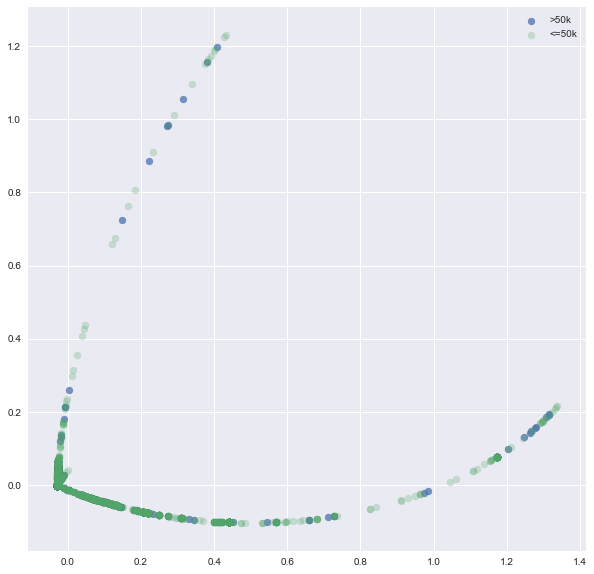

In [141]:
plt.subplots(figsize=(10, 10))
plt.scatter(x = 'a',y = 'b',data = pd_pca_x_train[pd_pca_x_train['c']==1],alpha = .75,label = '>50k')
plt.scatter(x = 'a',y = 'b',data = pd_pca_x_train[pd_pca_x_train['c']==0],alpha = .25,label = '<=50k')
plt.legend()


The data shows that this is not a very simple problem. The two groups overlap by a lot meaning there can be a multiple of the same instance but have different dependent variable.

### Benchmark Model: Logistic Regression

Plain logistic regression 

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
test_predicted = clf.predict(X_test)

In [145]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test,test_predicted)

0.78948406826477258

In [146]:
metrics.f1_score(y_test,test_predicted)

0.31908104658583275

In [147]:
print(classification_report(y_test, test_predicted))

             precision    recall  f1-score   support

        0.0       0.79      0.99      0.88      7586
        1.0       0.86      0.20      0.32      2551

avg / total       0.80      0.79      0.74     10137



### Machine Learning

### Combined

In [148]:
def combined(X_train, y_train,X_test,y_test,support,model,tuning_parameters):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report,accuracy_score,f1_score

    X_train = X_train.loc[:,support].values
    X_test = X_test.loc[:,support].values
    y_train = y_train.values
    y_test = y_test.values

    scores = ['accuracy','precision', 'recall','f1']
    
    for score in scores:
        print("# TUNING HYPER-PARAMETERS FOR %s" % score)
        print()

        clf = GridSearchCV(model, tuning_parameters, cv=5,
                           scoring=score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print('Accuracy: '+str(accuracy_score(y_true,y_pred)))
        print('f1 score: '+str(f1_score(y_true,y_pred)))
        print()
        print()
    return clf

In [149]:
tuning_parameters_svm = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                      'C': [ 10, 100, 1000] },
                    {'kernel': ['linear'], 'C': [ 10, 100, 1000]}]

In [201]:
from sklearn.svm import SVC
svm = combined(X_train, y_train,X_test,y_test,feat_selector.support_,SVC(),tuning_parameters_svm)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.776 (+/-0.005) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.752 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.792 (+/-0.002) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.776 (+/-0.005) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.787 (+/-0.006) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.792 (+/-0.002) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.787 (+/-0.006) for {'C': 10, 'kernel': 'linear'}
0.787 (+/-0.006) for {'C': 100, 'kernel': 'linear'}
0.787 (+/-0.006) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.78      0.99      0.88      7586
        1.0       0.88      0.19      0.32

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samp

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.913 (+/-0.015) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.898 (+/-0.040) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.015) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.757 (+/-0.035) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.898 (+/-0.040) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.757 (+/-0.032) for {'C': 10, 'kernel': 'linear'}
0.756 (+/-0.033) for {'C': 100, 'kernel': 'linear'}
0.756 (+/-0.033) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.77      1.00      0.87      7586
        1.0       0.92      0.11      0.19      2551

avg / total       0.81      0

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  '

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.188 (+/-0.038) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.302 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.188 (+/-0.038) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.326 (+/-0.033) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.302 (+/-0.017) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.327 (+/-0.032) for {'C': 10, 'kernel': 'linear'}
0.327 (+/-0.032) for {'C': 100, 'kernel': 'linear'}
0.327 (+/-0.032) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.79      0.98      0.87      7586
        1.0       0.80      0.21      0.33      2551

avg / total       0.79      0.79      0.74

In [202]:
from sklearn.neighbors import KNeighborsClassifier
tuning_parameters_knn = [{'n_neighbors': [5,11,17,23,37,47,77,103] }]

In [203]:
knn = combined(X_train, y_train,X_test,y_test,feat_selector.support_,KNeighborsClassifier(),tuning_parameters_knn)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_neighbors': 23}

Grid scores on development set:

0.825 (+/-0.013) for {'n_neighbors': 5}
0.832 (+/-0.012) for {'n_neighbors': 11}
0.832 (+/-0.009) for {'n_neighbors': 17}
0.832 (+/-0.006) for {'n_neighbors': 23}
0.831 (+/-0.008) for {'n_neighbors': 37}
0.830 (+/-0.007) for {'n_neighbors': 47}
0.828 (+/-0.004) for {'n_neighbors': 77}
0.823 (+/-0.007) for {'n_neighbors': 103}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.86      0.92      0.89      7586
        1.0       0.70      0.56      0.62      2551

avg / total       0.82      0.83      0.82     10137

Accuracy: 0.828647528855
f1 score: 0.620327868852


# TUNING HYPER-PARAMETERS FOR precision

Best parameters set found on development set:

{'n_neighbors': 77}

Grid scores on dev

In [211]:
from sklearn.ensemble import RandomForestClassifier
tuning_parameters_rf = [{'max_depth': [1,2,3,4,5,7,10,15,18,23,28],'min_samples_leaf':[10,50,100,500] }]

In [212]:
rf = combined(X_train, y_train,X_test,y_test,feat_selector.support_,RandomForestClassifier(),tuning_parameters_rf)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'max_depth': 28, 'min_samples_leaf': 10}

Grid scores on development set:

0.772 (+/-0.036) for {'max_depth': 1, 'min_samples_leaf': 10}
0.774 (+/-0.037) for {'max_depth': 1, 'min_samples_leaf': 50}
0.789 (+/-0.017) for {'max_depth': 1, 'min_samples_leaf': 100}
0.793 (+/-0.005) for {'max_depth': 1, 'min_samples_leaf': 500}
0.796 (+/-0.009) for {'max_depth': 2, 'min_samples_leaf': 10}
0.797 (+/-0.008) for {'max_depth': 2, 'min_samples_leaf': 50}
0.795 (+/-0.003) for {'max_depth': 2, 'min_samples_leaf': 100}
0.794 (+/-0.004) for {'max_depth': 2, 'min_samples_leaf': 500}
0.803 (+/-0.010) for {'max_depth': 3, 'min_samples_leaf': 10}
0.801 (+/-0.007) for {'max_depth': 3, 'min_samples_leaf': 50}
0.802 (+/-0.014) for {'max_depth': 3, 'min_samples_leaf': 100}
0.802 (+/-0.006) for {'max_depth': 3, 'min_samples_leaf': 500}
0.808 (+/-0.006) for {'max_depth': 4, 'min_samples_leaf': 10}
0.813 (+/-0.024) for {'ma

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'max_depth': 1, 'min_samples_leaf': 10}

Grid scores on development set:

0.944 (+/-0.060) for {'max_depth': 1, 'min_samples_leaf': 10}
0.752 (+/-0.754) for {'max_depth': 1, 'min_samples_leaf': 50}
0.929 (+/-0.084) for {'max_depth': 1, 'min_samples_leaf': 100}
0.942 (+/-0.098) for {'max_depth': 1, 'min_samples_leaf': 500}
0.933 (+/-0.038) for {'max_depth': 2, 'min_samples_leaf': 10}
0.927 (+/-0.044) for {'max_depth': 2, 'min_samples_leaf': 50}
0.898 (+/-0.051) for {'max_depth': 2, 'min_samples_leaf': 100}
0.893 (+/-0.068) for {'max_depth': 2, 'min_samples_leaf': 500}
0.941 (+/-0.053) for {'max_depth': 3, 'min_samples_leaf': 10}
0.928 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 50}
0.904 (+/-0.021) for {'max_depth': 3, 'min_samples_leaf': 100}
0.892 (+/-0.057) for {'max_depth': 3, 'min_samples_leaf': 500}
0.896 (+/-0.102) for {'max_depth': 4, 'min_samples_leaf': 10}
0.910 (+/-0.033) for {'max_depth': 4, 'min_samples_leaf': 50}
0.87

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'max_depth': 18, 'min_samples_leaf': 10}

Grid scores on development set:

0.247 (+/-0.169) for {'max_depth': 1, 'min_samples_leaf': 10}
0.216 (+/-0.255) for {'max_depth': 1, 'min_samples_leaf': 50}
0.180 (+/-0.237) for {'max_depth': 1, 'min_samples_leaf': 100}
0.249 (+/-0.250) for {'max_depth': 1, 'min_samples_leaf': 500}
0.323 (+/-0.069) for {'max_depth': 2, 'min_samples_leaf': 10}
0.325 (+/-0.058) for {'max_depth': 2, 'min_samples_leaf': 50}
0.313 (+/-0.043) for {'max_depth': 2, 'min_samples_leaf': 100}
0.310 (+/-0.022) for {'max_depth': 2, 'min_samples_leaf': 500}
0.377 (+/-0.036) for {'max_depth': 3, 'min_samples_leaf': 10}
0.342 (+/-0.051) for {'max_depth': 3, 'min_samples_leaf': 50}
0.364 (+/-0.039) for {'max_depth': 3, 'min_samples_leaf': 100}
0.337 (+/-0.057) for {'max_depth': 3, 'min_samples_leaf': 500}
0.405 (+/-0.053) for {'max_depth': 4, 'min_samples_leaf': 10}
0.387 (+/-0.037) for {'max_depth': 4, 'min_samples_leaf': 50}
0.3

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
tuning_parameters_gb = [{'loss': ['deviance','exponential'],'learning_rate':[.1,.01,.001],'n_estimators':[100,500,1000] }]

In [210]:
gb = combined(X_train, y_train,X_test,y_test,feat_selector.support_,GradientBoostingClassifier(),tuning_parameters_gb)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'deviance'}

Grid scores on development set:

0.857 (+/-0.009) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'deviance'}
0.862 (+/-0.007) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'deviance'}
0.861 (+/-0.007) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}
0.856 (+/-0.009) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'exponential'}
0.861 (+/-0.007) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'exponential'}
0.862 (+/-0.006) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'exponential'}
0.805 (+/-0.007) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss': 'deviance'}
0.853 (+/-0.008) for {'n_estimators': 500, 'learning_rate': 0.01, 'loss': 'deviance'}
0.856 (+/-0.008) for {'n_estimators': 1000, 'learning_rate': 0.01, 'loss': 'deviance'}
0.799 (+/-0.008) for {'n_estimators

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samp

Best parameters set found on development set:

{'n_estimators': 500, 'learning_rate': 0.001, 'loss': 'deviance'}

Grid scores on development set:

0.784 (+/-0.017) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'deviance'}
0.774 (+/-0.024) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'deviance'}
0.765 (+/-0.023) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}
0.780 (+/-0.023) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'exponential'}
0.770 (+/-0.028) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'exponential'}
0.767 (+/-0.023) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'exponential'}
0.978 (+/-0.031) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss': 'deviance'}
0.805 (+/-0.021) for {'n_estimators': 500, 'learning_rate': 0.01, 'loss': 'deviance'}
0.784 (+/-0.020) for {'n_estimators': 1000, 'learning_rate': 0.01, 'loss': 'deviance'}
0.978 (+/-0.038) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss':

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  '

Best parameters set found on development set:

{'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'exponential'}

Grid scores on development set:

0.668 (+/-0.029) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'deviance'}
0.690 (+/-0.025) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'deviance'}
0.692 (+/-0.027) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}
0.669 (+/-0.029) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'exponential'}
0.691 (+/-0.027) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'exponential'}
0.694 (+/-0.025) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'exponential'}
0.354 (+/-0.042) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss': 'deviance'}
0.643 (+/-0.032) for {'n_estimators': 500, 'learning_rate': 0.01, 'loss': 'deviance'}
0.666 (+/-0.028) for {'n_estimators': 1000, 'learning_rate': 0.01, 'loss': 'deviance'}
0.319 (+/-0.044) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss

In [153]:
from sklearn.ensemble import ExtraTreesClassifier
tuning_parameters_et = [{'max_depth': [10,15,20],'min_samples_leaf':[1,3,],'n_estimators':[500,1000],
                     'min_samples_split':[5,10,50] }]

In [154]:
et = combined(X_train, y_train,X_test,y_test,feat_selector.support_,ExtraTreesClassifier(),tuning_parameters_et)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}

Grid scores on development set:

0.797 (+/-0.004) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.797 (+/-0.005) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.797 (+/-0.006) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.797 (+/-0.005) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.795 (+/-0.004) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 50}
0.795 (+/-0.004) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 50}
0.796 (+/-0.005) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.796 (+/-0.004) for {'max_depth': 10

             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88      7586
        1.0       0.96      0.19      0.31      2551

avg / total       0.83      0.79      0.74     10137

Accuracy: 0.79382460294
f1 score: 0.314304461942


# TUNING HYPER-PARAMETERS FOR recall

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}

Grid scores on development set:

0.191 (+/-0.028) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.190 (+/-0.025) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.188 (+/-0.024) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.189 (+/-0.025) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.188 (+/-0.028) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_

             precision    recall  f1-score   support

        0.0       0.81      0.99      0.89      7586
        1.0       0.95      0.29      0.44      2551

avg / total       0.84      0.82      0.78     10137

Accuracy: 0.817401598106
f1 score: 0.444644464446




In [173]:
from sklearn.neural_network import MLPClassifier
tuning_parameters_mlp = [{'hidden_layer_sizes':[(128,32),(64,16),(32,8),(256,64),(128,64)]}]

In [214]:
mlp = combined(X_train, y_train,X_test,y_test,feat_selector.support_,MLPClassifier(),tuning_parameters_mlp)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'hidden_layer_sizes': (256, 64)}

Grid scores on development set:

0.800 (+/-0.007) for {'hidden_layer_sizes': (128, 32)}
0.802 (+/-0.008) for {'hidden_layer_sizes': (64, 16)}
0.800 (+/-0.007) for {'hidden_layer_sizes': (32, 8)}
0.804 (+/-0.007) for {'hidden_layer_sizes': (256, 64)}
0.798 (+/-0.011) for {'hidden_layer_sizes': (128, 64)}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.80      0.97      0.88      7586
        1.0       0.75      0.28      0.41      2551

avg / total       0.79      0.80      0.76     10137

Accuracy: 0.795402979185
f1 score: 0.407766990291


# TUNING HYPER-PARAMETERS FOR precision

Best parameters set found on development set:

{'hidden_layer_sizes': (128, 32)}

Grid scores on development set:

0.831 (+/-0.0

In [216]:
from sklearn.ensemble import AdaBoostClassifier 
tuning_parameters_ada = [{'learning_rate':[.1,.01,.001,.0001],
                         'n_estimators':[10,50,100,150]}]

In [217]:
ada = combined(X_train, y_train,X_test,y_test,feat_selector.support_,AdaBoostClassifier(),tuning_parameters_ada)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_estimators': 150, 'learning_rate': 0.1}

Grid scores on development set:

0.792 (+/-0.005) for {'n_estimators': 10, 'learning_rate': 0.1}
0.806 (+/-0.006) for {'n_estimators': 50, 'learning_rate': 0.1}
0.838 (+/-0.010) for {'n_estimators': 100, 'learning_rate': 0.1}
0.843 (+/-0.008) for {'n_estimators': 150, 'learning_rate': 0.1}
0.794 (+/-0.003) for {'n_estimators': 10, 'learning_rate': 0.01}
0.794 (+/-0.004) for {'n_estimators': 50, 'learning_rate': 0.01}
0.792 (+/-0.003) for {'n_estimators': 100, 'learning_rate': 0.01}
0.791 (+/-0.004) for {'n_estimators': 150, 'learning_rate': 0.01}
0.794 (+/-0.003) for {'n_estimators': 10, 'learning_rate': 0.001}
0.794 (+/-0.003) for {'n_estimators': 50, 'learning_rate': 0.001}
0.794 (+/-0.003) for {'n_estimators': 100, 'learning_rate': 0.001}
0.794 (+/-0.003) for {'n_estimators': 150, 'learning_rate': 0.001}
0.794 (+/-0.003) for {'n_estimators': 10, 'learni

In [218]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train.loc[:,feat_selector.support_], y_train.values)
dt_prediction = dt.predict(X_test.loc[:,feat_selector.support_])

In [219]:
metrics.accuracy_score(y_test,dt_prediction)

0.80664890993390548

In [220]:
metrics.f1_score(y_test,dt_prediction)

0.6013018714401952

### Balance the dataset (Oversampling)

In [159]:
sum(y_train)

5099.0

In [160]:
len(y_train)

20581

There are 5099 1's on the training dataset out of the 20581 total observations in the dataset. We will oversampe the 1's in the dataset by adding it 3x to our training dataset.

In [161]:
nrow = np.random.choice(len(y_train), sum(y_train==1),replace=False)

In [162]:
X_train_oversample = pd.DataFrame(X_train)

In [163]:
X_train_oversample = X_train_oversample.append(X_train.loc[y_train==1])

In [164]:
X_train_oversample = X_train_oversample.append(X_train.loc[y_train==1])

In [165]:
X_train_oversample = X_train_oversample.append(X_train.loc[y_train==1])

In [166]:
X_train_oversample.shape

(35878, 28)

In [167]:
y_train_oversample = y_train

In [168]:
y_train_oversample = y_train_oversample.append(y_train[y_train==1])

In [169]:
y_train_oversample = y_train_oversample.append(y_train[y_train==1])

In [170]:
y_train_oversample = y_train_oversample.append(y_train[y_train==1])

In [171]:
y_train_oversample.shape

(35878,)

In [175]:
svm_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,SVC(),tuning_parameters_svm)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.568 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.568 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.568 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.568 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.573 (+/-0.009) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.568 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.583 (+/-0.005) for {'C': 10, 'kernel': 'linear'}
0.584 (+/-0.005) for {'C': 100, 'kernel': 'linear'}
0.585 (+/-0.004) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.80      0.94      0.87      7586
        1.0       0.64      0.32      0.42      2551



C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      7586
        1.0       0.25      1.00      0.40      2551

avg / total       0.06      0.25      0.10     10137

Accuracy: 0.251652362632
f1 score: 0.40211223203


# TUNING HYPER-PARAMETERS FOR f1

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.725 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.725 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.725 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.725 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.563 (+/-0.263) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.725 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.462 (+/-0.010) for {'C': 10, 'kernel': 'linear'}
0.465 (+/-0.008) for {'C': 100, 'kernel': 'linear'}
0.466 (+/-0.007) for {'C': 1000, 'kernel': 'linear'}

Detailed classification re

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [204]:
knn_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,KNeighborsClassifier(),tuning_parameters_knn)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on development set:

0.842 (+/-0.014) for {'n_neighbors': 5}
0.820 (+/-0.015) for {'n_neighbors': 11}
0.812 (+/-0.011) for {'n_neighbors': 17}
0.812 (+/-0.014) for {'n_neighbors': 23}
0.801 (+/-0.011) for {'n_neighbors': 37}
0.797 (+/-0.010) for {'n_neighbors': 47}
0.790 (+/-0.010) for {'n_neighbors': 77}
0.783 (+/-0.011) for {'n_neighbors': 103}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.90      0.74      0.81      7586
        1.0       0.49      0.77      0.60      2551

avg / total       0.80      0.74      0.76     10137

Accuracy: 0.744105751208
f1 score: 0.60153609831


# TUNING HYPER-PARAMETERS FOR precision

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on develo

In [222]:
rf_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,RandomForestClassifier(),tuning_parameters_rf)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'max_depth': 23, 'min_samples_leaf': 10}

Grid scores on development set:

0.697 (+/-0.036) for {'max_depth': 1, 'min_samples_leaf': 10}
0.695 (+/-0.033) for {'max_depth': 1, 'min_samples_leaf': 50}
0.696 (+/-0.026) for {'max_depth': 1, 'min_samples_leaf': 100}
0.696 (+/-0.041) for {'max_depth': 1, 'min_samples_leaf': 500}
0.743 (+/-0.050) for {'max_depth': 2, 'min_samples_leaf': 10}
0.757 (+/-0.037) for {'max_depth': 2, 'min_samples_leaf': 50}
0.753 (+/-0.048) for {'max_depth': 2, 'min_samples_leaf': 100}
0.744 (+/-0.028) for {'max_depth': 2, 'min_samples_leaf': 500}
0.783 (+/-0.011) for {'max_depth': 3, 'min_samples_leaf': 10}
0.778 (+/-0.013) for {'max_depth': 3, 'min_samples_leaf': 50}
0.768 (+/-0.015) for {'max_depth': 3, 'min_samples_leaf': 100}
0.762 (+/-0.046) for {'max_depth': 3, 'min_samples_leaf': 500}
0.791 (+/-0.007) for {'max_depth': 4, 'min_samples_leaf': 10}
0.787 (+/-0.006) for {'ma

Best parameters set found on development set:

{'max_depth': 23, 'min_samples_leaf': 10}

Grid scores on development set:

0.782 (+/-0.023) for {'max_depth': 1, 'min_samples_leaf': 10}
0.784 (+/-0.021) for {'max_depth': 1, 'min_samples_leaf': 50}
0.785 (+/-0.014) for {'max_depth': 1, 'min_samples_leaf': 100}
0.794 (+/-0.019) for {'max_depth': 1, 'min_samples_leaf': 500}
0.820 (+/-0.008) for {'max_depth': 2, 'min_samples_leaf': 10}
0.809 (+/-0.019) for {'max_depth': 2, 'min_samples_leaf': 50}
0.816 (+/-0.016) for {'max_depth': 2, 'min_samples_leaf': 100}
0.807 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 500}
0.821 (+/-0.014) for {'max_depth': 3, 'min_samples_leaf': 10}
0.823 (+/-0.012) for {'max_depth': 3, 'min_samples_leaf': 50}
0.822 (+/-0.012) for {'max_depth': 3, 'min_samples_leaf': 100}
0.817 (+/-0.016) for {'max_depth': 3, 'min_samples_leaf': 500}
0.829 (+/-0.011) for {'max_depth': 4, 'min_samples_leaf': 10}
0.830 (+/-0.009) for {'max_depth': 4, 'min_samples_leaf': 50}
0.8

In [229]:
gb_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,GradientBoostingClassifier(),tuning_parameters_gb)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}

Grid scores on development set:

0.836 (+/-0.008) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'deviance'}
0.856 (+/-0.008) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'deviance'}
0.863 (+/-0.008) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}
0.833 (+/-0.011) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'exponential'}
0.854 (+/-0.011) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'exponential'}
0.860 (+/-0.009) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'exponential'}
0.797 (+/-0.005) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss': 'deviance'}
0.825 (+/-0.008) for {'n_estimators': 500, 'learning_rate': 0.01, 'loss': 'deviance'}
0.835 (+/-0.010) for {'n_estimators': 1000, 'learning_rate': 0.01, 'loss': 'deviance'}
0.796 (+/-0.005) for {'n_estimator

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}

Grid scores on development set:

0.861 (+/-0.006) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'deviance'}
0.878 (+/-0.007) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'deviance'}
0.884 (+/-0.006) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}
0.858 (+/-0.008) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'exponential'}
0.875 (+/-0.009) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'exponential'}
0.882 (+/-0.007) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'exponential'}
0.838 (+/-0.003) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss': 'deviance'}
0.853 (+/-0.006) for {'n_estimators': 500, 'learning_rate': 0.01, 'loss': 'deviance'}
0.860 (+/-0.008) for {'n_estimators': 1000, 'learning_rate': 0.01, 'loss': 'deviance'}
0.838 (+/-0.003) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss': 

In [176]:
et_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,ExtraTreesClassifier(),tuning_parameters_et)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}

Grid scores on development set:

0.783 (+/-0.016) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.781 (+/-0.008) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.779 (+/-0.008) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.782 (+/-0.015) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.781 (+/-0.016) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 50}
0.779 (+/-0.007) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 50}
0.778 (+/-0.010) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.780 (+/-0.004) for {'max_depth': 10

             precision    recall  f1-score   support

        0.0       0.96      0.70      0.81      7586
        1.0       0.50      0.90      0.64      2551

avg / total       0.84      0.75      0.77     10137

Accuracy: 0.749038176975
f1 score: 0.644593461861


# TUNING HYPER-PARAMETERS FOR recall

Best parameters set found on development set:

{'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}

Grid scores on development set:

0.949 (+/-0.005) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.948 (+/-0.009) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.948 (+/-0.008) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.949 (+/-0.005) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.946 (+/-0.007) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_sample

             precision    recall  f1-score   support

        0.0       0.96      0.70      0.81      7586
        1.0       0.50      0.91      0.65      2551

avg / total       0.84      0.75      0.77     10137

Accuracy: 0.750517904706
f1 score: 0.646145235763




In [230]:
mlp_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,MLPClassifier(),tuning_parameters_mlp)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'hidden_layer_sizes': (64, 16)}

Grid scores on development set:

0.583 (+/-0.008) for {'hidden_layer_sizes': (128, 32)}
0.598 (+/-0.058) for {'hidden_layer_sizes': (64, 16)}
0.586 (+/-0.012) for {'hidden_layer_sizes': (32, 8)}
0.583 (+/-0.009) for {'hidden_layer_sizes': (256, 64)}
0.580 (+/-0.010) for {'hidden_layer_sizes': (128, 64)}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.93      0.04      0.08      7586
        1.0       0.26      0.99      0.41      2551

avg / total       0.76      0.28      0.16     10137

Accuracy: 0.28026043208
f1 score: 0.409135082604


# TUNING HYPER-PARAMETERS FOR precision

Best parameters set found on development set:

{'hidden_layer_sizes': (64, 16)}

Grid scores on development set:

0.704 (+/-0.311)

In [231]:
ada_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,AdaBoostClassifier(),tuning_parameters_ada)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_estimators': 150, 'learning_rate': 0.1}

Grid scores on development set:

0.738 (+/-0.006) for {'n_estimators': 10, 'learning_rate': 0.1}
0.791 (+/-0.003) for {'n_estimators': 50, 'learning_rate': 0.1}
0.807 (+/-0.004) for {'n_estimators': 100, 'learning_rate': 0.1}
0.812 (+/-0.004) for {'n_estimators': 150, 'learning_rate': 0.1}
0.648 (+/-0.005) for {'n_estimators': 10, 'learning_rate': 0.01}
0.739 (+/-0.021) for {'n_estimators': 50, 'learning_rate': 0.01}
0.760 (+/-0.008) for {'n_estimators': 100, 'learning_rate': 0.01}
0.767 (+/-0.010) for {'n_estimators': 150, 'learning_rate': 0.01}
0.645 (+/-0.008) for {'n_estimators': 10, 'learning_rate': 0.001}
0.648 (+/-0.005) for {'n_estimators': 50, 'learning_rate': 0.001}
0.648 (+/-0.005) for {'n_estimators': 100, 'learning_rate': 0.001}
0.660 (+/-0.053) for {'n_estimators': 150, 'learning_rate': 0.001}
0.643 (+/-0.015) for {'n_estimators': 10, 'learni

In [232]:
dt_ovr = tree.DecisionTreeClassifier()
dt_ovr.fit(X_train_oversample.loc[:,feat_selector.support_], y_train_oversample.values)
dt_ovr_prediction = dt_ovr.predict(X_test.loc[:,feat_selector.support_])

In [233]:
metrics.accuracy_score(y_test,dt_ovr_prediction)

0.7940218999704054

In [234]:
metrics.f1_score(y_test,dt_ovr_prediction)

0.62580645161290316

### Undersampling

In [180]:
X_train.shape

(20581, 28)

In [181]:
nrow = X_train[y_train == 0].shape[0]

In [182]:
undersample_index = np.random.choice(nrow,X_train[y_train == 1].shape[0])

In [183]:
X_train_undersample = X_train[y_train == 0]

In [184]:
X_train_undersample = X_train_undersample.iloc[undersample_index,:]

In [185]:
X_train_undersample = X_train_undersample.append(X_train.loc[y_train==1])

In [186]:
X_train_undersample.shape

(10198, 28)

In [187]:
y_train_undersample = y_train[y_train == 0]

In [188]:
y_train_undersample = y_train_undersample.iloc[undersample_index]

In [189]:
y_train_undersample = y_train_undersample.append(y_train.loc[y_train==1])

In [190]:
sum(y_train_undersample==1)

5099

In [243]:
svm_und = combined(X_train_undersample, y_train_undersample,X_test,y_test,feat_selector.support_,SVC(),tuning_parameters_svm)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:

0.569 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.517 (+/-0.007) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.591 (+/-0.009) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.569 (+/-0.008) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.623 (+/-0.008) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.591 (+/-0.009) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.623 (+/-0.007) for {'C': 10, 'kernel': 'linear'}
0.624 (+/-0.009) for {'C': 100, 'kernel': 'linear'}
0.624 (+/-0.008) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.80      0.95      0.87      7586
        1.0       0.68      0.30      0.42      2551

a

In [205]:
knn_und = combined(X_train_undersample, y_train_undersample,X_test,y_test,feat_selector.support_,KNeighborsClassifier(),tuning_parameters_knn)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_neighbors': 11}

Grid scores on development set:

0.766 (+/-0.028) for {'n_neighbors': 5}
0.777 (+/-0.018) for {'n_neighbors': 11}
0.776 (+/-0.017) for {'n_neighbors': 17}
0.772 (+/-0.021) for {'n_neighbors': 23}
0.770 (+/-0.016) for {'n_neighbors': 37}
0.765 (+/-0.015) for {'n_neighbors': 47}
0.757 (+/-0.014) for {'n_neighbors': 77}
0.748 (+/-0.024) for {'n_neighbors': 103}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.91      0.74      0.82      7586
        1.0       0.51      0.79      0.62      2551

avg / total       0.81      0.76      0.77     10137

Accuracy: 0.755844924534
f1 score: 0.619874059284


# TUNING HYPER-PARAMETERS FOR precision

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on deve

In [244]:
rf_und = combined(X_train_undersample, y_train_undersample,X_test,y_test,feat_selector.support_,RandomForestClassifier(),tuning_parameters_rf)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'max_depth': 18, 'min_samples_leaf': 10}

Grid scores on development set:

0.711 (+/-0.029) for {'max_depth': 1, 'min_samples_leaf': 10}
0.727 (+/-0.044) for {'max_depth': 1, 'min_samples_leaf': 50}
0.698 (+/-0.085) for {'max_depth': 1, 'min_samples_leaf': 100}
0.698 (+/-0.080) for {'max_depth': 1, 'min_samples_leaf': 500}
0.745 (+/-0.056) for {'max_depth': 2, 'min_samples_leaf': 10}
0.729 (+/-0.032) for {'max_depth': 2, 'min_samples_leaf': 50}
0.733 (+/-0.027) for {'max_depth': 2, 'min_samples_leaf': 100}
0.719 (+/-0.023) for {'max_depth': 2, 'min_samples_leaf': 500}
0.746 (+/-0.031) for {'max_depth': 3, 'min_samples_leaf': 10}
0.748 (+/-0.033) for {'max_depth': 3, 'min_samples_leaf': 50}
0.747 (+/-0.027) for {'max_depth': 3, 'min_samples_leaf': 100}
0.746 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 500}
0.770 (+/-0.024) for {'max_depth': 4, 'min_samples_leaf': 10}
0.766 (+/-0.035) for {'ma

Best parameters set found on development set:

{'max_depth': 15, 'min_samples_leaf': 10}

Grid scores on development set:

0.658 (+/-0.224) for {'max_depth': 1, 'min_samples_leaf': 10}
0.681 (+/-0.042) for {'max_depth': 1, 'min_samples_leaf': 50}
0.682 (+/-0.039) for {'max_depth': 1, 'min_samples_leaf': 100}
0.681 (+/-0.035) for {'max_depth': 1, 'min_samples_leaf': 500}
0.702 (+/-0.047) for {'max_depth': 2, 'min_samples_leaf': 10}
0.743 (+/-0.034) for {'max_depth': 2, 'min_samples_leaf': 50}
0.723 (+/-0.078) for {'max_depth': 2, 'min_samples_leaf': 100}
0.708 (+/-0.061) for {'max_depth': 2, 'min_samples_leaf': 500}
0.742 (+/-0.061) for {'max_depth': 3, 'min_samples_leaf': 10}
0.753 (+/-0.069) for {'max_depth': 3, 'min_samples_leaf': 50}
0.712 (+/-0.070) for {'max_depth': 3, 'min_samples_leaf': 100}
0.723 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 500}
0.780 (+/-0.029) for {'max_depth': 4, 'min_samples_leaf': 10}
0.775 (+/-0.049) for {'max_depth': 4, 'min_samples_leaf': 50}
0.7

In [245]:
gb_und = combined(X_train_undersample, y_train_undersample,X_test,y_test,feat_selector.support_,GradientBoostingClassifier(),tuning_parameters_gb)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}

Grid scores on development set:

0.826 (+/-0.029) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'deviance'}
0.833 (+/-0.031) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'deviance'}
0.834 (+/-0.027) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'deviance'}
0.824 (+/-0.030) for {'n_estimators': 100, 'learning_rate': 0.1, 'loss': 'exponential'}
0.831 (+/-0.033) for {'n_estimators': 500, 'learning_rate': 0.1, 'loss': 'exponential'}
0.832 (+/-0.025) for {'n_estimators': 1000, 'learning_rate': 0.1, 'loss': 'exponential'}
0.788 (+/-0.022) for {'n_estimators': 100, 'learning_rate': 0.01, 'loss': 'deviance'}
0.818 (+/-0.027) for {'n_estimators': 500, 'learning_rate': 0.01, 'loss': 'deviance'}
0.825 (+/-0.029) for {'n_estimators': 1000, 'learning_rate': 0.01, 'loss': 'deviance'}
0.789 (+/-0.020) for {'n_estimator

In [191]:
et_und = combined(X_train_undersample, y_train_undersample,X_test,y_test,feat_selector.support_,ExtraTreesClassifier(),tuning_parameters_et)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}

Grid scores on development set:

0.703 (+/-0.057) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.695 (+/-0.065) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.696 (+/-0.053) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.695 (+/-0.062) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.700 (+/-0.076) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 50}
0.701 (+/-0.038) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 50}
0.703 (+/-0.027) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.701 (+/-0.059) for {'max_depth': 1

             precision    recall  f1-score   support

        0.0       0.81      0.95      0.88      7586
        1.0       0.71      0.35      0.47      2551

avg / total       0.79      0.80      0.78     10137

Accuracy: 0.801815132682
f1 score: 0.473670421797


# TUNING HYPER-PARAMETERS FOR recall

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}

Grid scores on development set:

0.462 (+/-0.179) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.486 (+/-0.135) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.496 (+/-0.162) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.475 (+/-0.134) for {'max_depth': 10, 'n_estimators': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.492 (+/-0.156) for {'max_depth': 10, 'n_estimators': 500, 'min_samples_leaf': 1, 'min_samples

             precision    recall  f1-score   support

        0.0       0.92      0.82      0.87      7586
        1.0       0.60      0.80      0.68      2551

avg / total       0.84      0.81      0.82     10137

Accuracy: 0.813850251554
f1 score: 0.683760683761




In [246]:
mlp_und = combined(X_train_undersample, y_train_undersample,X_test,y_test,feat_selector.support_,MLPClassifier(),tuning_parameters_mlp)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'hidden_layer_sizes': (128, 64)}

Grid scores on development set:

0.623 (+/-0.007) for {'hidden_layer_sizes': (128, 32)}
0.620 (+/-0.009) for {'hidden_layer_sizes': (64, 16)}
0.620 (+/-0.011) for {'hidden_layer_sizes': (32, 8)}
0.623 (+/-0.008) for {'hidden_layer_sizes': (256, 64)}
0.624 (+/-0.007) for {'hidden_layer_sizes': (128, 64)}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.80      0.96      0.87      7586
        1.0       0.71      0.30      0.42      2551

avg / total       0.78      0.79      0.76     10137

Accuracy: 0.792838117786
f1 score: 0.420529801325


# TUNING HYPER-PARAMETERS FOR precision

Best parameters set found on development set:

{'hidden_layer_sizes': (64, 16)}

Grid scores on development set:

0.824 (+/-0.04

In [247]:
ada_und = combined(X_train_undersample, y_train_undersample,X_test,y_test,feat_selector.support_,AdaBoostClassifier(),tuning_parameters_ada)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'n_estimators': 150, 'learning_rate': 0.1}

Grid scores on development set:

0.732 (+/-0.025) for {'n_estimators': 10, 'learning_rate': 0.1}
0.770 (+/-0.017) for {'n_estimators': 50, 'learning_rate': 0.1}
0.797 (+/-0.017) for {'n_estimators': 100, 'learning_rate': 0.1}
0.805 (+/-0.020) for {'n_estimators': 150, 'learning_rate': 0.1}
0.697 (+/-0.014) for {'n_estimators': 10, 'learning_rate': 0.01}
0.722 (+/-0.015) for {'n_estimators': 50, 'learning_rate': 0.01}
0.730 (+/-0.020) for {'n_estimators': 100, 'learning_rate': 0.01}
0.747 (+/-0.033) for {'n_estimators': 150, 'learning_rate': 0.01}
0.662 (+/-0.047) for {'n_estimators': 10, 'learning_rate': 0.001}
0.669 (+/-0.059) for {'n_estimators': 50, 'learning_rate': 0.001}
0.699 (+/-0.020) for {'n_estimators': 100, 'learning_rate': 0.001}
0.702 (+/-0.026) for {'n_estimators': 150, 'learning_rate': 0.001}
0.662 (+/-0.047) for {'n_estimators': 10, 'learni

In [248]:
dt_und = tree.DecisionTreeClassifier()
dt_und.fit(X_train_undersample.loc[:,feat_selector.support_], y_train_undersample.values)
dt_und_prediction = dt_und.predict(X_test.loc[:,feat_selector.support_])

In [249]:
metrics.accuracy_score(y_test,dt_und_prediction)

0.76077735030087801

In [250]:
metrics.f1_score(y_test,dt_und_prediction)

0.61805008662781546

In [1571]:
print('Unbalanced Dataset:')
print('svm accuracy: '+str(metrics.accuracy_score(y_test,svm.predict(X_test.loc[:,feat_selector.support_].values))))
print('knn accuracy: '+str(metrics.accuracy_score(y_test, knn.predict(X_test.loc[:,feat_selector.support_].values))))
print('rf accuracy: '+str(metrics.accuracy_score(y_test, rf.predict(X_test.loc[:,feat_selector.support_].values))))
print('gb accuracy: '+str(metrics.accuracy_score(y_test, gb.predict(X_test.loc[:,feat_selector.support_].values))))
print('et accuracy: '+str(metrics.accuracy_score(y_test, et.predict(X_test.loc[:,feat_selector.support_].values))))
print('mlp accuracy: '+str(metrics.accuracy_score(y_test, mlp.predict(X_test.loc[:,feat_selector.support_].values))))
print('ada accuracy: '+str(metrics.accuracy_score(y_test, ada.predict(X_test.loc[:,feat_selector.support_].values))))
print('dt accuracy: '+str(metrics.accuracy_score(y_test, dt.predict(X_test.loc[:,feat_selector.support_].values))))
print()
print('Balanced Dataset: Oversampling')
print('svm ovr accuracy: '+str(metrics.accuracy_score(y_test,svm_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('knn ovr accuracy: '+str(metrics.accuracy_score(y_test, knn_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('rf ovr accuracy: '+str(metrics.accuracy_score(y_test, rf_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('gb ovr accuracy: '+str(metrics.accuracy_score(y_test, gb_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('et ovr accuracy: '+str(metrics.accuracy_score(y_test, et_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('mlp ovr accuracy: '+str(metrics.accuracy_score(y_test, mlp_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('ada ovr accuracy: '+str(metrics.accuracy_score(y_test, ada_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('dt ovr accuracy: '+str(metrics.accuracy_score(y_test, dt_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print()
print('Balanced Dataset: Undersampling')
print('svm und accuracy: '+str(metrics.accuracy_score(y_test,svm_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('knn und accuracy: '+str(metrics.accuracy_score(y_test, knn_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('rf und accuracy: '+str(metrics.accuracy_score(y_test, rf_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('gb und accuracy: '+str(metrics.accuracy_score(y_test, gb_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('et und accuracy: '+str(metrics.accuracy_score(y_test, et_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('mlp und accuracy: '+str(metrics.accuracy_score(y_test, mlp_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('ada und accuracy: '+str(metrics.accuracy_score(y_test, ada_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('dt und accuracy: '+str(metrics.accuracy_score(y_test, dt_und.predict(X_test.loc[:,feat_selector.support_].values))))

Unbalanced Dataset:
svm accuracy: 0.787116503897
knn accuracy: 0.830916444708
rf accuracy: 0.852816415113
gb accuracy: 0.858833974549
et accuracy: 0.817401598106
mlp accuracy: 0.798559731676
ada accuracy: 0.841175890303
dt accuracy: 0.806648909934

Balanced Dataset: Oversampling
svm ovr accuracy: 0.251652362632
knn ovr accuracy: 0.744105751208
rf ovr accuracy: 0.803492157443
gb ovr accuracy: 0.812370523824
et ovr accuracy: 0.750517904706
mlp ovr accuracy: 0.787017855381
ada ovr accuracy: 0.748347637368
dt ovr accuracy: 0.79402189997

Balanced Dataset: Undersampling
svm und accuracy: 0.788793528657
knn und accuracy: 0.752490875012
rf und accuracy: 0.811877281247
gb und accuracy: 0.813850251554
et und accuracy: 0.813850251554
mlp und accuracy: 0.775870573148
ada und accuracy: 0.789286771234
dt und accuracy: 0.760777350301


In [1572]:
print('Unbalanced Dataset')
print('svm f1: '+str(metrics.f1_score(y_test,svm.predict(X_test.loc[:,feat_selector.support_].values))))
print('knn f1: '+str(metrics.f1_score(y_test, knn.predict(X_test.loc[:,feat_selector.support_].values))))
print('rf f1: '+str(metrics.f1_score(y_test, rf.predict(X_test.loc[:,feat_selector.support_].values))))
print('gb f1: '+str(metrics.f1_score(y_test, gb.predict(X_test.loc[:,feat_selector.support_].values))))
print('et f1: '+str(metrics.f1_score(y_test, et.predict(X_test.loc[:,feat_selector.support_].values))))
print('mlp f1: '+str(metrics.f1_score(y_test, mlp.predict(X_test.loc[:,feat_selector.support_].values))))
print('ada f1: '+str(metrics.f1_score(y_test, ada.predict(X_test.loc[:,feat_selector.support_].values))))
print('dt f1: '+str(metrics.f1_score(y_test, dt.predict(X_test.loc[:,feat_selector.support_].values))))
print()
print('Balanced Dataset: Oversampling')
print('svm ovr f1: '+str(metrics.f1_score(y_test,svm_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('knn ovr f1: '+str(metrics.f1_score(y_test, knn_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('rf ovr f1: '+str(metrics.f1_score(y_test, rf_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('gb ovr f1: '+str(metrics.f1_score(y_test, gb_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('et ovr f1: '+str(metrics.f1_score(y_test, et_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('mlp ovr f1: '+str(metrics.f1_score(y_test, mlp_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('ada ovr f1: '+str(metrics.f1_score(y_test, ada_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print('dt ovr f1: '+str(metrics.f1_score(y_test, dt_ovr.predict(X_test.loc[:,feat_selector.support_].values))))
print()
print('Balanced Dataset: Undersampling')
print('svm und f1: '+str(metrics.f1_score(y_test,svm_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('knn und f1: '+str(metrics.f1_score(y_test, knn_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('rf und f1: '+str(metrics.f1_score(y_test, rf_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('gb und f1: '+str(metrics.f1_score(y_test, gb_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('et und f1: '+str(metrics.f1_score(y_test, et_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('mlp und f1: '+str(metrics.f1_score(y_test, mlp_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('ada und f1: '+str(metrics.f1_score(y_test, ada_und.predict(X_test.loc[:,feat_selector.support_].values))))
print('dt und f1: '+str(metrics.f1_score(y_test, dt_und.predict(X_test.loc[:,feat_selector.support_].values))))

Unbalanced Dataset
svm f1: 0.328144458281
knn f1: 0.63547426627
rf f1: 0.647780925401
gb f1: 0.688574537541
et f1: 0.444644464446
mlp f1: 0.402574605032
ada f1: 0.608272506083
dt f1: 0.60130187144

Balanced Dataset: Oversampling
svm ovr f1: 0.40211223203
knn ovr f1: 0.60153609831
rf ovr f1: 0.69173630455
gb ovr f1: 0.703090852326
et ovr f1: 0.646145235763
mlp ovr f1: 0.428987040465
ada ovr f1: 0.641763797219
dt ovr f1: 0.625806451613

Balanced Dataset: Undersampling
svm und f1: 0.416462251295
knn und f1: 0.619675610126
rf und f1: 0.688856257138
gb und f1: 0.698224852071
et und f1: 0.683760683761
mlp und f1: 0.409256370255
ada und f1: 0.665936815765
dt und f1: 0.618050086628
